# Visualization of K-Means applied on features

In [390]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [391]:
from src.hierarchical_properties.k_means import k_means_img_patch
from src.data_generation.utils import downsample_img

In [392]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

In [393]:
# Constants
img_path = r"../../data/img_trial/fish_2.png"

full_size = 448
patch_sizes = [112, 56, 28, 14]
patches_paths = ["../../data/img_trial/block4_1.png",
                 "../../data/img_trial/block3_1.png",
                 "../../data/img_trial/block2_1.jpg",
                 "../../data/img_trial/block1_1.png"]

# K-Means
k_s = [2, 4, 6, 8]
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True
bilinear_interpolation_flag = cv.INTER_LINEAR
nn_interpolation_flag = cv.INTER_NEAREST

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [394]:
img = cv.imread(img_path)
img = downsample_img(img, full_size, full_size, False)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [395]:
final_images_bilinear_interp = []
final_images_nn_interp = []


for patch_path in patches_paths:
    patch = cv.imread(patch_path)
    patch = cv.cvtColor(patch, cv.COLOR_BGR2RGB)
    for k in k_s:
        seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter,
                                   epsilon=epsilon, attempts=attempts,
                                   normalize=normalize, plot=False)
        seg_full = downsample_img(
            seg_patch, full_size, full_size, False,
            interpolation_method=bilinear_interpolation_flag)

        # Convert the original image as grayscale image to put it in the
        # background to be able to put the patch (the output of Kmeans)
        # over it in a transparent way.
        # Single channel grayscale image
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # Repeat the grayscale image along all the 3 channels
        stacked_img = np.stack((img_gray,) * 3, axis=-1)
        final_img_bilinear_interp = cv.addWeighted(
            stacked_img, weight_original_img, seg_full, weight_colored_patch,
            gamma)
        final_images_bilinear_interp.append(final_img_bilinear_interp)

        seg_full_nearest_neighbor_interp = downsample_img(
            seg_patch, full_size, full_size, False,
            interpolation_method=nn_interpolation_flag)

        nearest_neighbor_interp_final_img = cv.addWeighted(
            stacked_img, weight_original_img,
            seg_full_nearest_neighbor_interp,
            weight_colored_patch, gamma)
        final_images_nn_interp.append(nearest_neighbor_interp_final_img)


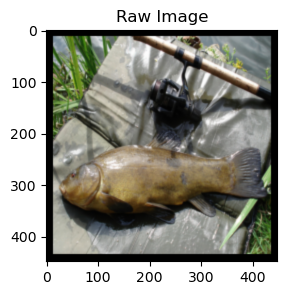

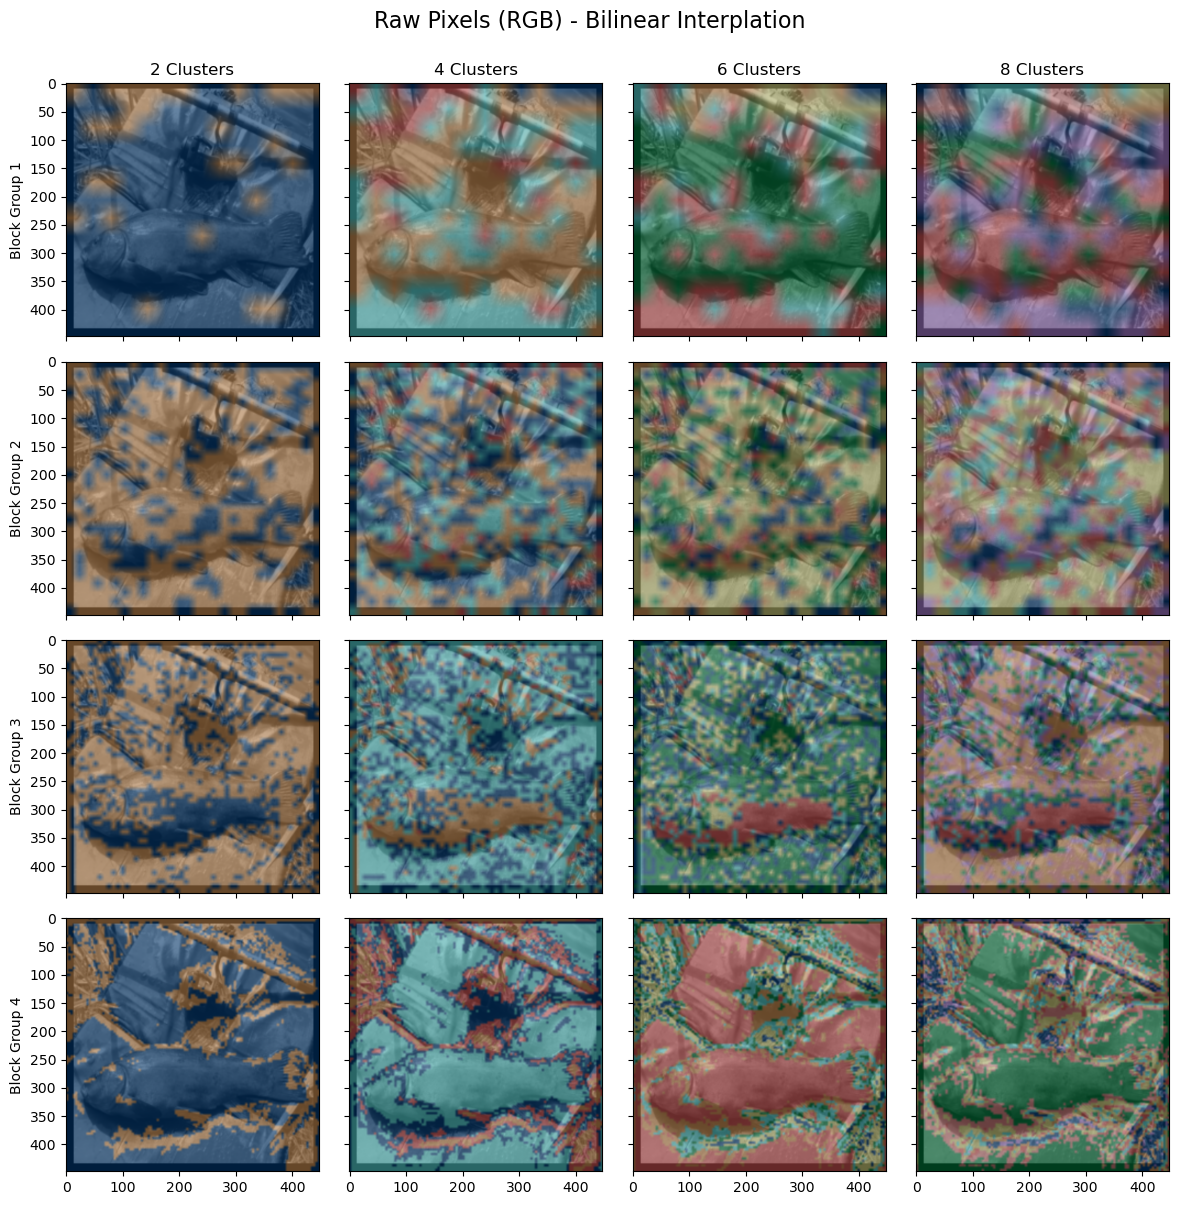

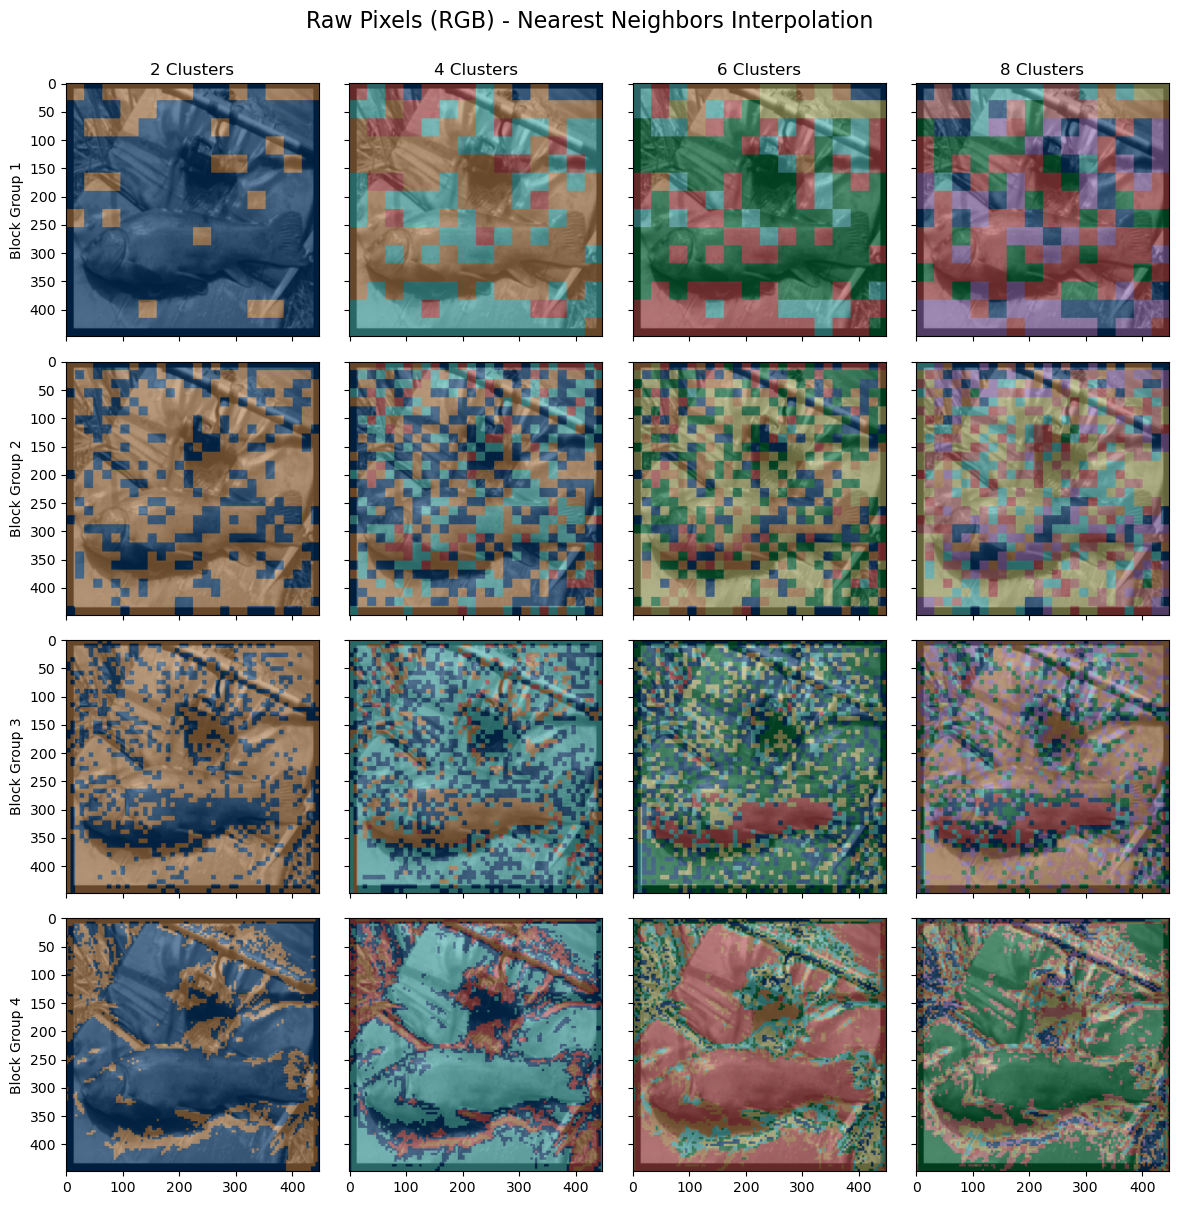

In [396]:
# Plots

# Raw Image
fig = plt.figure(figsize=(3, 3))
plt.title("Raw Image")
plt.imshow(img)
plt.show()

# Bilinear Interplation
fig, axs = plt.subplots(nrows=len(patch_sizes), ncols=len(k_s), figsize=(12, 12),
                        sharex=True, sharey=True)
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_bilinear_interp, axs):
    if i % len(k_s) == 0:
        ax.set_ylabel(f"Block Group {int((i / len(k_s)) + 1)}")
    if i < len(k_s):
        ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("Raw Pixels (RGB) - Bilinear Interplation", y=1.0, fontsize=16)
fig.tight_layout()
plt.show()

# Nearest Neighbors Interpolation
fig, axs = plt.subplots(nrows=len(patch_sizes), ncols=len(k_s), figsize=(12, 12),
                        sharex=True, sharey=True)
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_nn_interp, axs):
    if i % len(k_s) == 0:
        ax.set_ylabel(f"Block Group {int((i / len(k_s)) + 1)}")
    if i < len(k_s):
        ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("Raw Pixels (RGB) - Nearest Neighbors Interpolation", y=1.0, fontsize=16)
fig.tight_layout()
plt.show()

# Visualization of K-Means applied on features (step by step)

In [397]:
k = 2

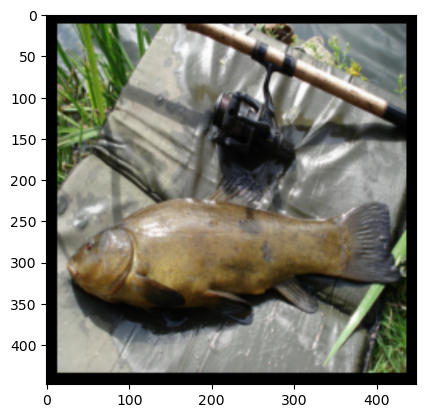

In [398]:
plt.imshow(img)
plt.show()

In [399]:
patch_path = r"../../data/img_trial/block1_1.png"
patch = cv.imread(patch_path)
patch = cv.cvtColor(patch, cv.COLOR_BGR2RGB)

In [400]:
patch.shape

(112, 112, 3)

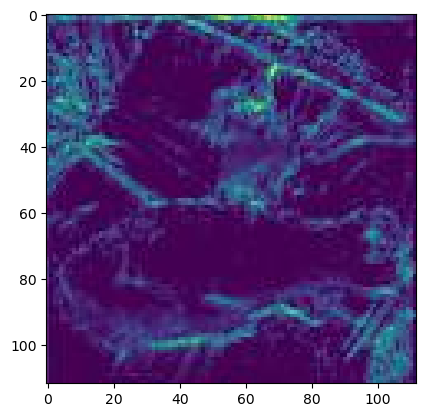

In [401]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

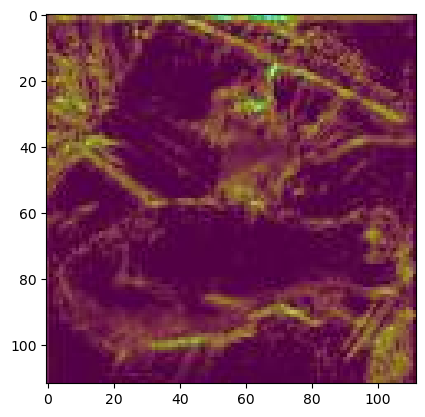

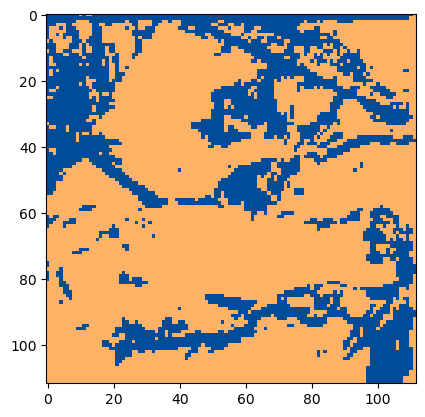

In [402]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Bilinear Interpolation

In [403]:
seg_full = downsample_img(seg_patch, full_size, full_size, False, interpolation_method=bilinear_interpolation_flag)

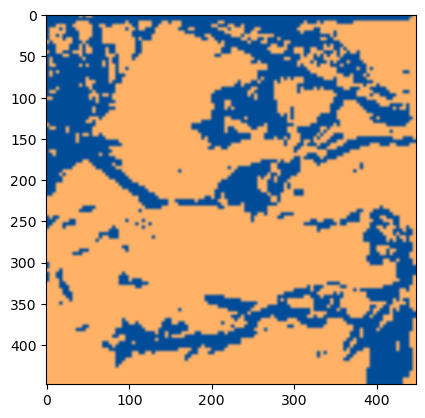

In [404]:
plt.imshow(seg_full)
plt.show()

In [405]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [406]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

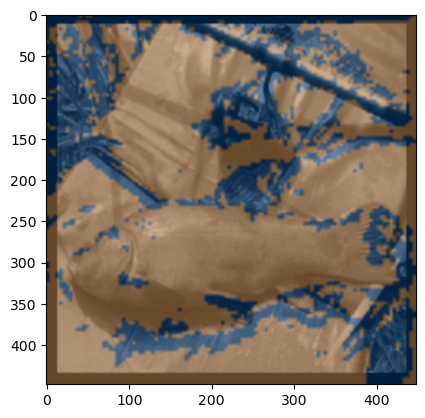

In [407]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [408]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=nn_interpolation_flag)

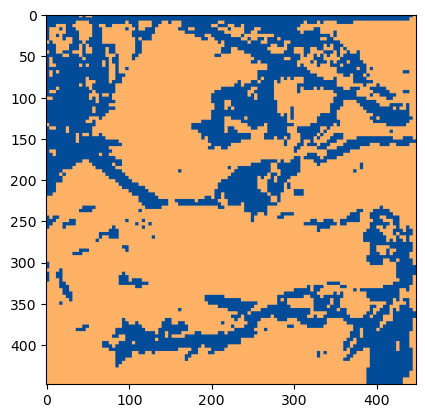

In [409]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [410]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

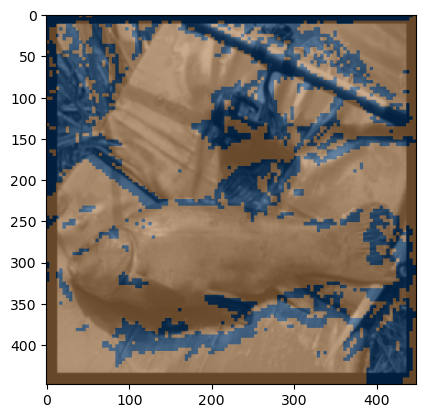

In [411]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()